In [ ]:
# pre-requisites
! pip install nibabel torch==1.5.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

# AI in Medicine
From vectors and matrices to artificial intelligence

## Images, MRI and Deep Learning
### Python Programming: *computer vision* and *pytorch*

Instructors:
- Fabian Eitel, AG Ritter, Charité (fabian.eitel@charite.de)

July 2020

## Aims of this session

- How to work with images and MRI data in programming languages. 
- How to use a convolutional neural network (CNN) with images.

## Instructions

Code cells contain the *#TODO* mark which you need to replace and fill with the appropriate code.
Solutions can be found at the end of the Notebook, only go there if you are really stuck. Ask questions first!
The exercises are sequential, i.e. you need to often finish them in the right order. Sometimes solutions for previous exercises can be found in later excersises but that would be boring. You will be able to take away most from this lecture if you actually try to solve all excersises.

**Feel free to ask questions any time! ** 

# 1. Working with normal images
### Opening images with python

In [1]:
%matplotlib inline

In [2]:
# Import required packages
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image

We have an image file stored in our directory which we would like to work with using Python. First, we have to open the image using a file reader.

In [6]:
image_path = "data/car.jpg"

There are many different tools to read a jpeg image into python. Here we will use the common Pillow (PIL) package.

In [7]:
# loading the image
image = Image.open(image_path)

**Exercise 1.1: Show the image using matplotlib**

In [13]:
# TODO

### Images on computers
Computers store everything in binary code, only 1s and 0s. However, on a higher level, an operating system (OS) stores data in a more structured fashion. This allows us to understand and modify the data much better than the binary information. How are images stored and handled?

The result from exercise 1.1 shows the image in a 2D grid, i.e. it has an X and a Y axis. A 2D grid can be seen as a simple matrix. In python we often store any kind of matrix, such as a vector, a matrix or a tensor as an array.

**Exercise 1.2: Use numpy to convert the image into an array**

In [17]:
image_array = # TODO

SyntaxError: invalid syntax (<ipython-input-17-a6688732b837>, line 1)

**Exercise 1.3: Print the shape of the array**

In [21]:
# TODO

You'll notice that the matrix is in fact 3D, not 2D! The last dimension represents the color dimension, it has 3 channels: red, green and blue.

**Exercise 1.4: Plot only one of the color channels**

Do you remember how to do slicing of objects in Python? You can use brackets [] to select a specific channel. First, you need to select all values in the X and the Y dimension using [:] then select a color channel and plot the image.

In [22]:
# select all from the first two dimensions and only a single value from the last dimension
image_array_single_color = image_array[ #TODO ,#TODO ,#TODO]
# plot the image using matplotlib. Matplotlib accepts arrays/matrices just as it accepts Pillow Images.
#TODO(image_array_single_color)

SyntaxError: unexpected EOF while parsing (<ipython-input-22-ea93f3d1c7be>, line 4)

### What's inside the array?
If the image is simply a matrix, we should be able to have a look at what's inside!

**Exercise 1.5: Use the *print* function to print the contents of *image_array* **

In [27]:
# TODO 

The dots in the output show that the output is too long to be printed in this window. For simplicity, let's just look at the first 5x5 values using slicing.

**Exercise 1.6: Use the *print* function to print the contents of the first 5x5 items in *image_array* **

Hint: Use "," to separate slicing per dimension and use *:X* to select from the beginning to value X.

In [33]:
# TODO

You should see 5 rows, nested within 5 larger rows. Each row contains three values: red, green and blue!

# 2. Modifying image contents

Next, let's see how we can modify the contents of the matrix and how that effects plotting of the image.

**Exercise 2.1: Set the first 100x100 values to zero and then plot the image. **

In [38]:
zeroed_image = np.copy(image_array) # copy the values to a new variable
zeroed_image[] # TODO select the desired region and set that value to 0

plt.imshow(zeroed_image) # plot the image

SyntaxError: invalid syntax (<ipython-input-38-8f68b82e64f1>, line 2)

Notice how the top left corner is simply black now? If we set all three RGB channels to zero, the pixels will be black.

**Exercise 2.2: Color the first 100x100 values white this time.**

First we need to find out which range the image values lie in, typically colors are encoded between 0-1 (as floats) or 0-255 (as integers).

In [41]:
# use the print and the np.max() function to find out the pixel value which represents white
# TODO

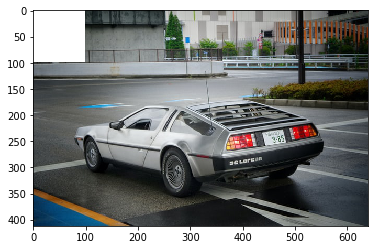

In [42]:
# now we do the same as in Exercise 2.1 but set the values to the max value from above instead of 0.
zeroed_image[:100, :100] = 255

plt.imshow(zeroed_image) # plot the image
plt.show()

**Exercise 2.3: Remove red from the image.**

Set all pixels in the red color channel to 0.

Hint: use *:* on the two spatial dimensions and *0* on the channel dimension.

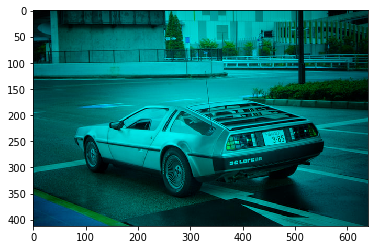

In [43]:
no_red_image = np.copy(image_array)
no_red_image[# TODO
plt.imshow(no_red_image) # plot the image

**Exercise 2.4: Reduce the color intensity by dividing the entire matrix by 4.**

In [ ]:
reduced_image = np.copy(image_array)
reduced_image = # TODO
plt.imshow(reduced_image.astype("uint8")) # plot the image, note that we need to convert it back to integers first!

Next, we will apply a simple **filter/kernel** to the image, which is typical to what a convolutional neural network does. We will convolve the filter with the image, meaning that the filter (which is smaller than the image) will be moved across all the spatial positions in the image. This process is often called sliding window as well.

In [65]:
from scipy.ndimage import convolve

In [164]:
# first we create two different kinds of kernel.
horizontal_kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1,-1]
])

vertical_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0,1]
])

The two kernels above are typical edge detector filters, edge detection is important to find boundaries between different objects. By just looking at the numbers and considering how the kernels are slid over the image, one can understand that the horizontal kernel works alongs the y-axis, highlighting patterns where there is a sharp difference in values above and below the line. The same reasoning can be used to make sense of the vertical kernel.

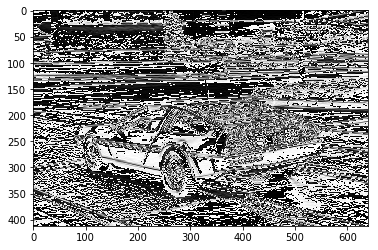

In [182]:
horizontally_filtered = convolve(image_array[:,:,0], horizontal_kernel)
plt.imshow(horizontally_filtered, cmap='gray')
plt.show()

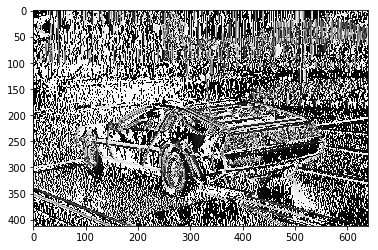

In [183]:
vertically_filtered = convolve(image_array[:,:,0], vertical_kernel)
plt.imshow(vertically_filtered, cmap='gray')
plt.show()

As you can see the filters highlight all the horizontal and vertical edges in the image, however since the image contains many "grainy" areas like the road and the buildings, as well as diagonal lines, such as the road markings it is quite difficult to make sense of the image content from these results. Nevertheless, the car, as the main object, is highlighted nicely in both versions. 

# 3. MRI are matrices as well

**Exercise 3.1: Load the MR image.**

Check where the MRI file is located and its filename to load it into a variable.

In [169]:
# first we load the image using the nibabel (nib) library
nifti = nib.load(#TODO)
# we can find meta information in the header of the object
print(nifti.header)

In [175]:
# in order to access the data we can use the object's get_data() function
mri_data = nifti.get_data()

**Exercise 3.2: Print the shape of the MRI and it's content.**

In [178]:
# print the shape
# TODO
# print the content
# TODO

**Exercise 3.3: Plot a slice of the matrix using pyplot.**
Before you have used pyplot to plot the image of the car. In order to plot the 3D MRI as a 2D image we need to select a single slice only.

Hint: it makes sense to select a slice in the center as the slices on the very edge of the MRI are typically empty.

Hint: you need to use array indexing. For 2 dimensions you should use the all selector `:` and for the other dimension you need to select a slice.

In [185]:
# TODO plot the MRI and try the same code with selecting different 
# axis to show the axial, coronal and sagittal views of the MRI.

Don't like the color stain? You can set another parameter in the `imshow` function called to paint the image in grayscale: `cmap='gray'`.

In [ ]:
# TODO plot the image in gray

# 4. Convolutional Neural Networks

As you have learned in the lecture, convolutional neural networks apply **filters** in a hierarchical (layer-wise) fashion. Using reasoning to come up with simple edge detector filters, like above, or even face recognition filters (see [Viola Jones algorithm](https://de.wikipedia.org/wiki/Viola-Jones-Methode)) seems plausible, but doing that for abstract concepts such as cars, or brain diseases is impossible. Convolutional neural networks are able to learn those filters automatically using backpropagation. Interestingly, it was investigated, that CNNs trained on images often learn exactly those kind of edge detection filters in their earliest layers. Since different filters are combined along the depth of the network, more challenging concepts can be extracted by using deep networks.

Next, we will use a trained neural network to predict on the MR image from above whether the subject has Alzheimer's disease or not.

**Exercise 4.1: Mask the image. **

Currently, the image still contains the brain skull. We can use a brain mask as a simple way to remove it. Our brain mask is **binary** meaning that it only contains 1s and 0s. A 1 everywhere there is gray matter or white matter, and a 0 otherwise.

In [25]:
mask = nib.load("data/binary_brain_mask.nii.gz").get_data()

(193, 229, 193)


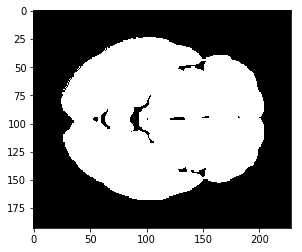

In [198]:
print(mask.shape)
plt.imshow(mask[:,:,70], cmap='gray')
plt.show()

In [ ]:
# apply the mask to the image
masked_mri = # TODO
# plot the masked image
plt.imshow(#TODO)
plt.show()

**Exercise 4.2: Adjust the image size. **

The network expects inputs to be of size (96, 114, 96) which is exactly **half** of the size of the MRI. We can use the `zoom` function from `scipy` to match the size.

In [187]:
from scipy.ndimage.interpolation import zoom

In [200]:
mri_data_zoomed = # TODO

(96, 114, 96)


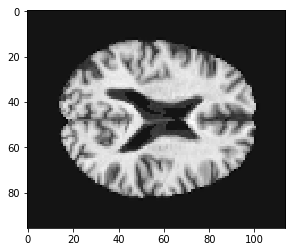

In [205]:
print(mri_data_zoomed.shape)
plt.imshow(mri_data_zoomed[:,:,48], cmap='gray')
plt.show()

Note: you might notice that the masking together with the zooming isn't perfect. Better methods to strip the skull from individual subjects exist such as FSL BET.

## Network definition
Below the class 'NeuralNetwork' specifies the class for our CNN, defined in the PyTorch framework. You do not need to understand all of it for now, but you can identify the different building blocks. You can see Convolutional, MaxPooling and Linear (fully connected) layers, as well as dropout, ELU and sigmoid activations.

In [244]:
# import pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [245]:
# Convert the zoomed and masked MRI to a PyTorch Tensor.
# Details for the curious:
# This is simply another class to handle a multi-dimensional matrix.
# The neural network expects the shape of the data to be 5 dimensional,
# so we add 2 length 1-dimensions at the beginning (unsqueeze).
# Also we convert the values to float.
mri_tensor = torch.from_numpy(mri_data_zoomed).unsqueeze(0).unsqueeze(0).float()

In [267]:
class NeuralNetwork(nn.Module):
    def __init__(self, drp_rate=0.3):
        super(NeuralNetwork, self).__init__()
        self.drp_rate = drp_rate
        self.dropout = nn.Dropout3d(p=self.drp_rate)
        self.Conv_1 = nn.Conv3d(1, 64, kernel_size=3, stride=1, padding=0)
        self.pool_1 = nn.MaxPool3d(kernel_size=3, stride=3, padding=0)
        self.Conv_2 = nn.Conv3d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool_2 = nn.MaxPool3d(kernel_size=3, stride=2, padding=0)
        self.Conv_3 = nn.Conv3d(64, 64, kernel_size=3, stride=1, padding=0)
        self.Conv_4 = nn.Conv3d(64, 64, kernel_size=3, stride=1, padding=0)
        self.Conv_5 = nn.Conv3d(64, 36, kernel_size=3, stride=1, padding=0)
        self.pool_4 = nn.MaxPool3d(kernel_size=4, stride=2, padding=0)
        
        self.classifier_scratch = nn.Sequential(
            nn.Linear(1296, 80),
            nn.Linear(80, 1)
        )

    def encode(self, x, print_size=False):
        if print_size:
            print(x.shape)
        x = F.elu(self.Conv_1(x))
        h = self.dropout(self.pool_1(x))
        x = F.elu(self.Conv_2(h))
        if print_size:
            print(x.shape)
        h = self.dropout(self.pool_2(x))
        x = F.elu(self.Conv_3(h))
        if print_size:
            print(x.shape)
        x = F.elu(self.Conv_4(x))
        if print_size:
            print(x.shape)
        x = F.elu(self.Conv_5(x))
        if print_size:
            print(x.shape)
        h = self.dropout(self.pool_4(x))
        if print_size:
            print(h.shape)
        
        return h

    def forward(self, x):
        print_size = False
        x = self.encode(x, print_size=print_size)
        x = self.flatten(x)
        x = self.classifier_scratch(x)
        x = F.sigmoid(x)
        return x
    
    def flatten(self, x):
        return x.view(x.size(0), -1)

In [268]:
# create an instance of the NeuralNetwork class
net = NeuralNetwork()

In [274]:
# using the print function we can see the parts of the model
print(net)

NeuralNetwork(
  (dropout): Dropout3d(p=0.3)
  (Conv_1): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_1): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Conv_2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_2): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv_3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (Conv_4): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (Conv_5): Conv3d(64, 36, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_4): MaxPool3d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier_scratch): Sequential(
    (0): Linear(in_features=1296, out_features=80, bias=True)
    (1): Linear(in_features=80, out_features=1, bias=True)
  )
)


Load the pre-trained weights of the model.

In [275]:
net.load_state_dict(torch.load("data/cnn_params.h5", map_location='cpu'), strict=False)
# we need to set the model to 'evaluation' mode to turn off dropout during prediction
net.eval()

NeuralNetwork(
  (dropout): Dropout3d(p=0.3)
  (Conv_1): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_1): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (Conv_2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_2): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv_3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (Conv_4): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (Conv_5): Conv3d(64, 36, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (pool_4): MaxPool3d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier_scratch): Sequential(
    (0): Linear(in_features=1296, out_features=80, bias=True)
    (1): Linear(in_features=80, out_features=1, bias=True)
  )
)

The neural network was trained to decode Alzheimer's Disease from healthy controls. Hence, it is a **binary classification**. That is why the 'sigmoid' activation is used as an output: it squishes the values between 0 and 1 making them look like an S-curve:

![Sigmoid Curve Image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/1920px-Sigmoid-function-2.svg.png)

We have trained the network using the class encodings:

0 - Healthy Control

1 - Alzheimer's Disease Patient

So any value that the network outputs that is above 0.5 are classified as AD, whereas the values below 0.5 are classified as HC. 

**Exercise 4.3: Use the network to predict on the MR image. **

Now we have ensured that the image has the right dimension and data type, the network has is ready with some pre-trained weights. As a last exercise you should use the 'forward' function of the neural network to predict which class the image belongs to.

In [ ]:
result = # TODO
print(result)

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

# Solutions









Don't go past here if you want to solve the questions on your own!

**Exercise 1.1: Show the image using matplotlib**

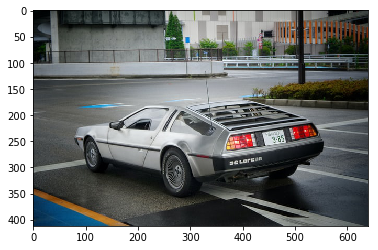

In [8]:
plt.imshow(image)
plt.show()

**Exercise 1.2: Use numpy to convert the image into a matrix**

In [9]:
image_array = np.array(image)

**Exercise 1.3: Print the shape of the matrix**

In [10]:
print(image_array.shape)

(412, 640, 3)


**Exercise 1.4: Plot only one of the color channels**

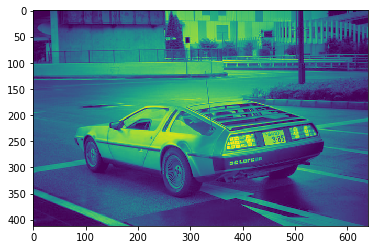

In [11]:
# select all from the first two dimensions and only a single value from the last dimension
image_array_single_color = image_array[:,:,0]
# plot the image
plt.imshow(image_array_single_color)
plt.show()

**Exercise 1.5: Use the *print* function to print the contents of *image_array* **

In [12]:
print(image_array)

[[[ 5 11 11]
  [ 5 11 11]
  [ 5 11 11]
  ...
  [58 62 61]
  [57 61 60]
  [54 58 57]]

 [[ 5 11 11]
  [ 5 11 11]
  [ 4 10 10]
  ...
  [63 67 66]
  [62 66 65]
  [61 65 64]]

 [[ 4 10 10]
  [ 4 10 10]
  [ 3  9  9]
  ...
  [61 67 67]
  [62 68 68]
  [62 68 68]]

 ...

 [[ 1 42 72]
  [ 3 44 74]
  [ 4 45 73]
  ...
  [31 40 47]
  [31 40 47]
  [32 41 48]]

 [[ 0 39 70]
  [ 2 41 72]
  [ 3 42 71]
  ...
  [32 39 47]
  [31 40 47]
  [31 40 47]]

 [[ 4 39 71]
  [ 4 40 72]
  [ 4 43 74]
  ...
  [31 38 46]
  [31 38 46]
  [31 38 46]]]


**Exercise 1.6: Use the *print* function to print the contents of the first 5x5 items in *image_array* **

In [13]:
print(image_array[:5,:5])

[[[ 5 11 11]
  [ 5 11 11]
  [ 5 11 11]
  [ 5 11 11]
  [ 5 11 11]]

 [[ 5 11 11]
  [ 5 11 11]
  [ 4 10 10]
  [ 4 10 10]
  [ 4 10 10]]

 [[ 4 10 10]
  [ 4 10 10]
  [ 3  9  9]
  [ 3  9  9]
  [ 3  9  9]]

 [[ 3  7  8]
  [ 3  7  8]
  [ 3  7  8]
  [ 3  7  8]
  [ 3  7  8]]

 [[ 2  6  7]
  [ 2  6  7]
  [ 2  6  7]
  [ 1  5  6]
  [ 1  5  6]]]


**Exercise 2.1: Set the first 100x100 values to zero and then plot the image. **

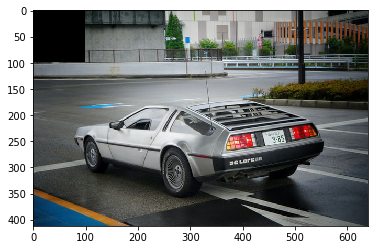

In [14]:
zeroed_image = np.copy(image_array) # copy the values to a new variable
zeroed_image[:100,:100] = 0

plt.imshow(zeroed_image)
plt.show()

**Exercise 2.2: Color the first 100x100 values white this time.**

First we need to find out which range the image values lie in, typically colors are encoded between 0-1 (as floats) or 0-255 (as integers).

In [15]:
# use the print and the np.max() function to find out the pixel value which represents white
print(np.max(zeroed_image))

255


**Exercise 2.3: Remove red from the image.**

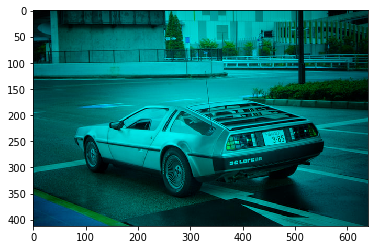

In [16]:
no_red_image = np.copy(image_array)
no_red_image[:,:,0] = 0
plt.imshow(no_red_image) # plot the image
plt.show()

**Exercise 2.4: Reduce the color intensity by dividing the entire matrix by 4.**

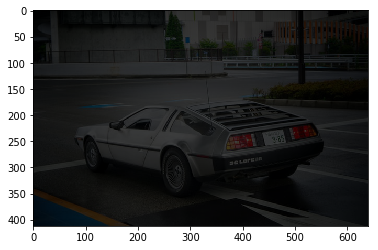

In [18]:
reduced_image = np.copy(image_array)
reduced_image = reduced_image / 4
plt.imshow(reduced_image.astype("uint8")) # plot the image, note that we need to convert it back to integers first!
plt.show()

**Exercise 3.1: Load the MR image.**

In [19]:
# first we load the image using the nibabel (nib) library
nifti = nib.load("data/MRI_subject.nii.gz")
# we can find meta information in the header of the object
print(nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 193 229 193   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.0
qoffset_y       : -132.0
qoffset_z       : -78.0
srow_x          : [0. 0. 0. 0.]
srow_y         

In [20]:
# in order to access the data we can use the object's get_data() function
mri_data = nifti.get_data()

**Exercise 3.2: Print the shape of the MRI and it's content.**

In [21]:
# print the shape
print(mri_data.shape)
# print the content
print(mri_data)

(193, 229, 193)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

**Exercise 3.3: Plot a slice of the matrix using pyplot.**
Before you have used pyplot to plot the image of the car. In order to plot the 3D MRI as a 2D image we need to select a single slice only.

Hint: it makes sense to select a slice in the center as the slices on the very edge of the MRI are typically empty.

Hint: you need to use array indexing. For 2 dimensions you should use the all selector `:` and for the other dimension you need to select a slice.

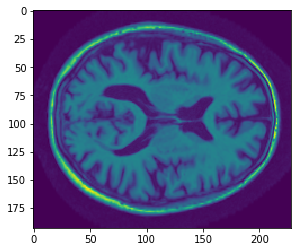

In [22]:
plt.imshow(mri_data[:,:,90])
plt.show()

Don't like the color stain? You can set another parameter in the `imshow` function called to paint the image in grayscale: `cmap='gray'`.

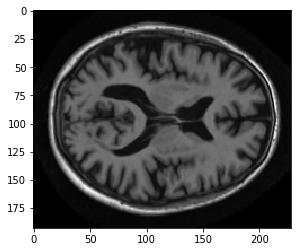

In [23]:
plt.imshow(mri_data[:,:,90], cmap='gray')
plt.show()

**Exercise 4.1: Mask the image. **

Currently, the image still contains the brain skull. We can use a brain mask as a simple way to remove it. Our brain mask is **binary** meaning that it only contains 1s and 0s. A 1 everywhere there is gray matter or white matter, and a 0 otherwise.

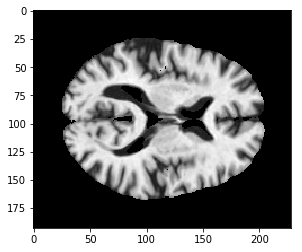

In [27]:
# apply the mask to the image
masked_mri = mri_data * mask
# plot the masked image
plt.imshow(masked_mri[:,:,90], cmap='gray')
plt.show()

**Exercise 4.2: Adjust the image size. **

The network expects inputs to be of size (96, 114, 96) which is exactly **half** of the size of the MRI. We can use the `zoom` function from `scipy` to match the size.

In [187]:
from scipy.ndimage.interpolation import zoom

In [200]:
mri_data_zoomed = zoom(input=masked_mri, zoom=0.5)

**Exercise 4.3: Use the network to predict on the MR image. **

Now we have ensured that the image has the right dimension and data type, the network has is ready with some pre-trained weights. As a last exercise you should use the 'forward' function of the neural network to predict which class the image belongs to.

In [272]:
result = net.forward(mri_tensor)
print(result)

The image should be classified as Alzheimer's Disease.